# EDA on 1000 Movies Data Set 

Presented By : Devender Sharma 


Term 1&2 EDA Project



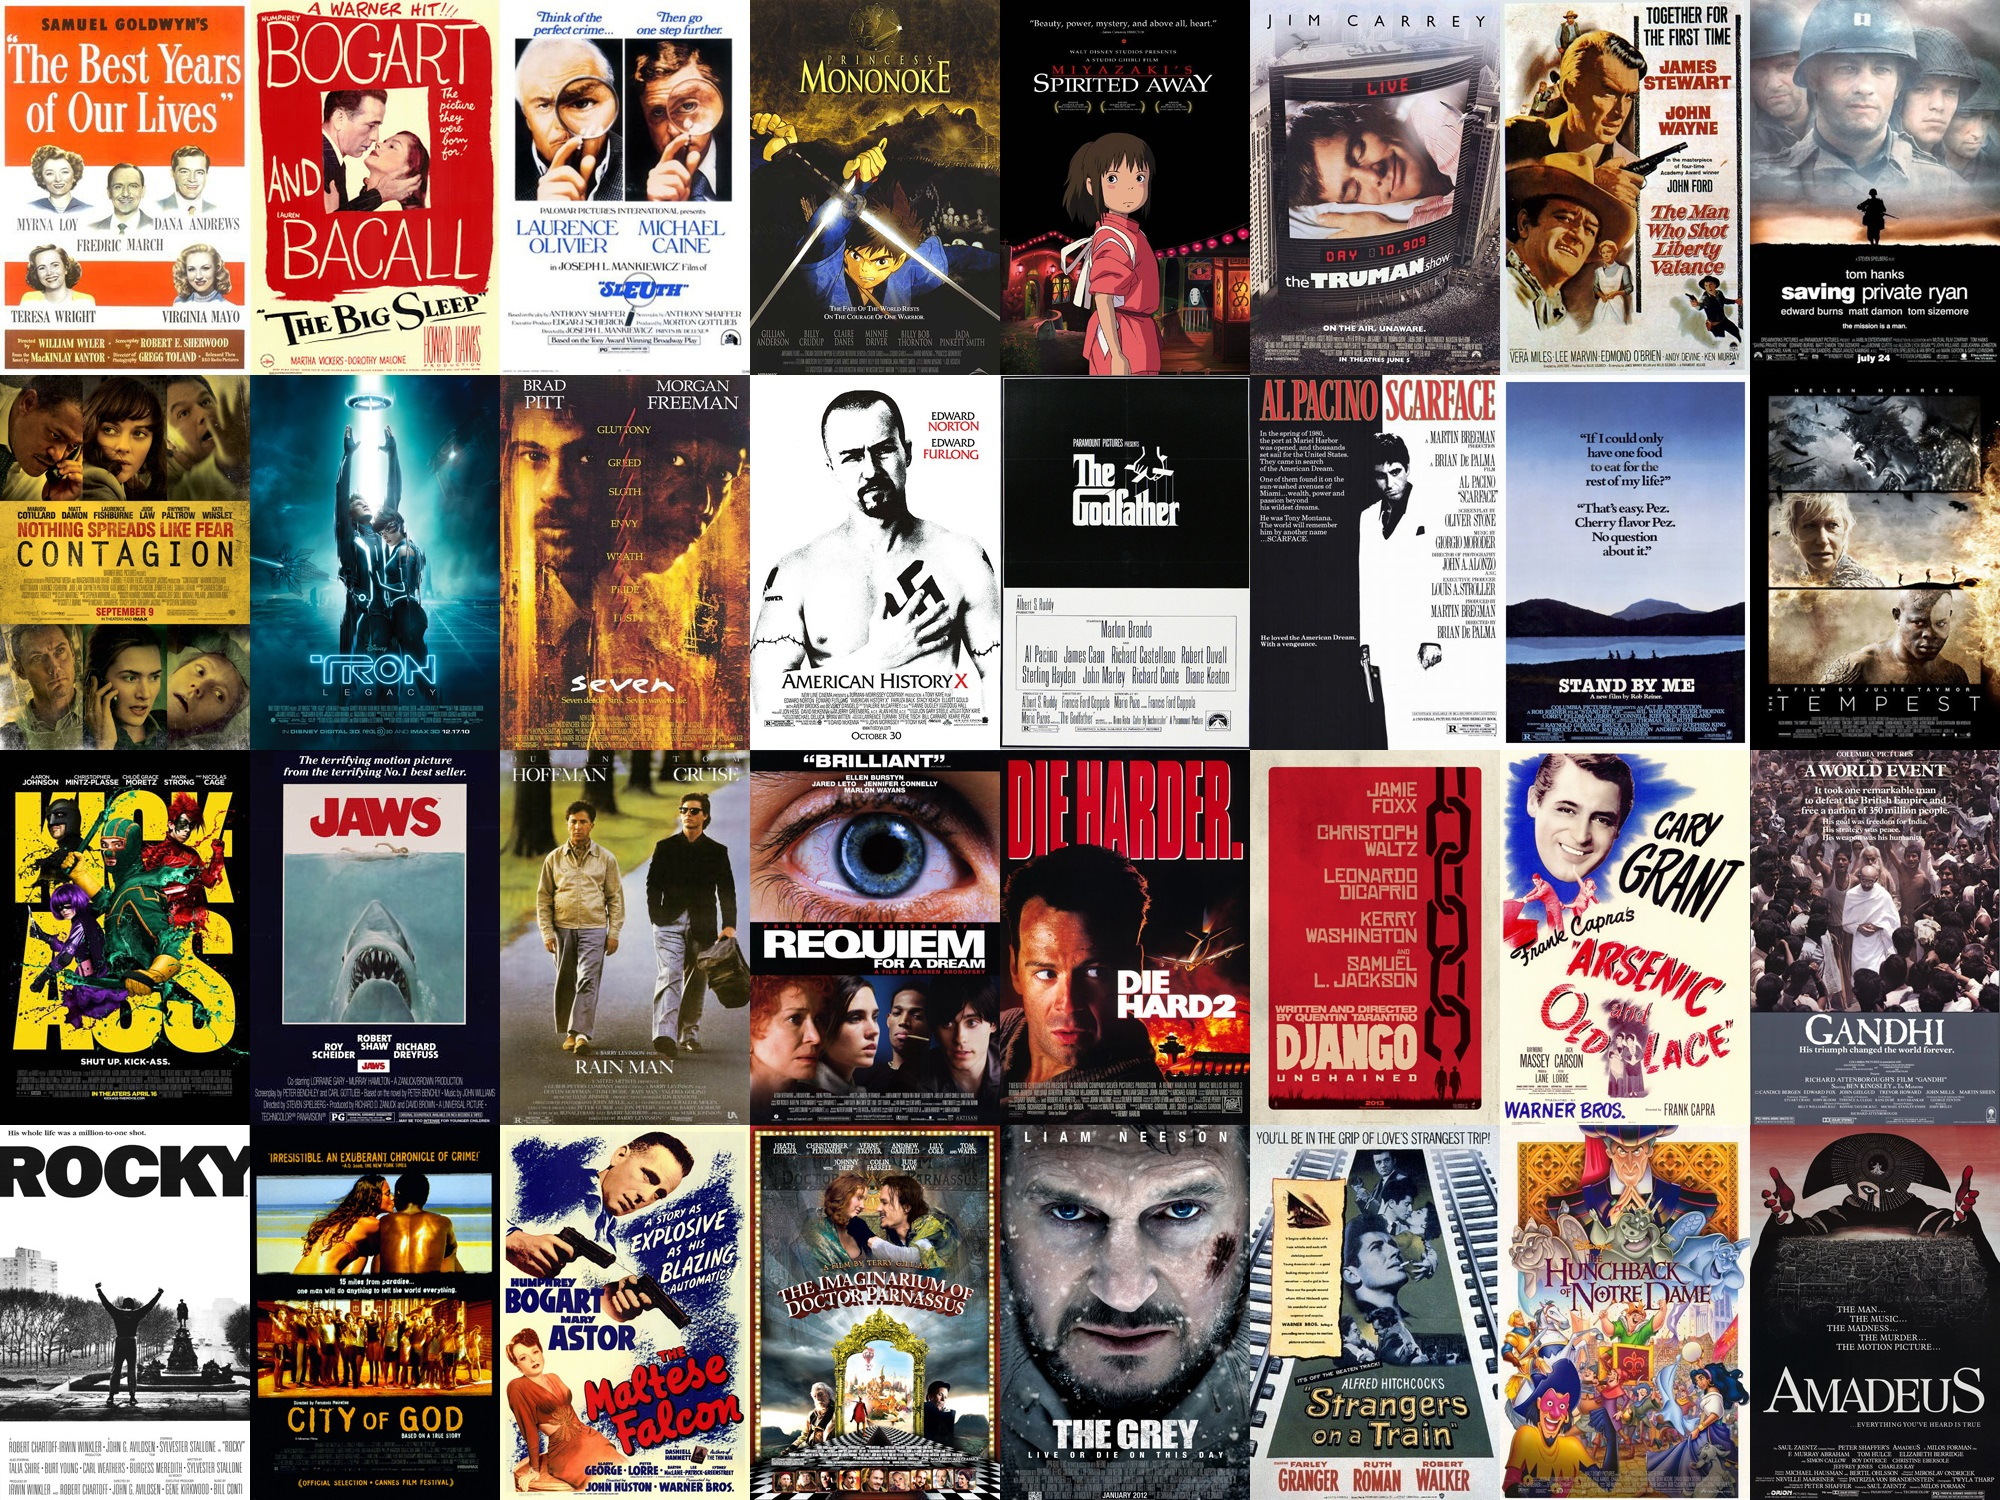



## Table of Contents

## Table of Contents

1. [Introduction](#section1)
    - 1.1 [Background](#section101)
    - 1.2 [Datasource & Dataset](#section102)
    
2. [Problem Statement](#section2)
3. [Importing Packages](#section3)
4. [Loading Dataset](#section4)
    -  4.1 [Description of the Dataset](#section401)
    -  4.2 [Pandas Pre-profiling](#section402)
5. [Data Preprocessing](#section5)
    - 5.1 [standardize the data](#section501)
    
    - 5.2 [Pandas profiling after Data Processing](#section502)
   
6. [Exploratory Data Analysis](#section6)
    -  6.1 [Analysis Based on Grouping of Genre](#section601)
       - 6.1.2 [Which Genre Got Highest Rating](#section6011)
      
    -  6.2 [Analysis Based on Movies Released Year](#section602)
       
    -  6.3 [Analysis Based on Directors & There Respective Movies ](#section603)
       - 6.3.1 [Which Director has Directed Maximum No. of Movies](#section6031)
       - 6.3.2 [Which Director Movie has Generated Maximum revenue](#section6032)
       
    -  6.4 [Analysis Based on Correlation Between all the Dataset](#section604)
       - 6.4.1 [Checking Correlation using Rank, votes & Metascore](#section6041)
       - 6.4.2 [Checking Correlation using Reveune, Rating & Metascore](#section6042)
       - 6.4.3 [Checking Correlation using rating & Runtime](#section6043)
       
    -  6.5 [Analysis Based on Movies categorised in Blockbuster](#section605)
       - 6.5.1 [Using Boxplot analyze how rating effects the Blockbuster](#section6051)
       - 6.5.2 [Using boxplot analyze how reveune effects the Blockbuster](#section6051)
       - 6.5.3 [Using Boxplot analyze how Runtime effects the Blockbuster](#section6053)
       
7. [Conclusion](#section7)
     - 7.1  [Actionable Insights](#section7.1)


# 1. Introduction

## 1.1 Background

A commercial success movie not only entertains audience, but also enables film companies to gain tremendous profit. 
A lot of factors such as good directors, experienced actors are considerable for creating good movies.However, 
famous directors and actors can always bring an expected box-office income but cannot guarantee a highly rated imdb score.



### 1.2 Data Source & Dataset

The data source is taken from Github provided by Insaid in term 1 & 2 project guidlines.

This dataset is a collection of details about the 1000 movies released in between 2006 - 2016 (source IMDB database)
having 1000 rows and 12 columns

Below is the data dictionary explaining the various columns of the dataset

| Columns | Description     |
|---------|-----------------|
|   Rank  | Rank of the Movies from 1 to 1000|
| Title   |The title of the Movie|
|Genre    | A multi casting list of genres used to classify the movie|
|Description|Quick glance about the story of movie|
|Director   |Movie's director Name|
|Actors     |The Star Cast of the Movie|
|Year       |In Which year movie is released|
|Runtime (Minutes)|The duration of the movie in minutes.|
|Rating|Ratings given by users for the movie |
|Votes|Number of votes received by a movie|
|Revenue (Millions) | Revenue collection of movies in millions|
|Metascore|Metascore is a weighted average in that we assign more importance, or weight, to some critics and publications than others, based on their quality and overall stature.|


# 2. Problem Statement

Based on the massive movie information, it would be interesting to understand what are the important factors that make a movie more successful than others. So, we would like to analyze what kind of movies are more successful, in other words, get higher IMDB score. We also want to show the results of this analysis in an intuitive way by visualizing outcome.

In this project, we take IMDB scores as response variable and focus on operating predictions by analyzing the rest of variables in the IMDB 1000 movie data. The results can help film companies to understand the secret of generating a commercial success movie.

# 3. Importing Pacakges

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [4]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

In [5]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

# 4. Loading DataSet

In [115]:
My_dataset = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')

My_dataset

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, along with their supervisor, is suddenly torn apart when they discover that one of their own teenage daughters has been brutally murdered.",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts, Dean Norris",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,"Three American college students studying abroad are lured to a Slovakian hostel, and discover the grim reality behind it.",Eli Roth,"Lauren German, Heather Matarazzo, Bijou Phillips, Roger Bart",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance students from different backgrounds at the Maryland School of the Arts.,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura, Adam G. Sevani",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reunite their pal with the woman he was going to marry.,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Shannon Woodward",2014,93,5.6,4881,NaN,22.0


## 4.1  Description of the Dataset

In [12]:
# Find out the total rows and columns of the DataFrame
My_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


- ```info``` function gives us the following insights into the My_dataset dataframe:

  - There are a total of **1000 samples (rows)** and **12 columns** in the dataframe.
  
  - There are **7 columns** with a **numeric** datatype and **5 columns** with an **object** datatype.
  
  - There are **missing** values in the **Revenue(Millions) & Metascore** column.

In [6]:
# Check for number of unique values for the column 'Title'
My_dataset.Title.nunique()

999

Now the problem here is we have 1000 movies dataset but the title showing 999 count.

so we can check - Is there any duplicate movie ?

In [13]:
My_dataset.Title.duplicated().any()

True

In [14]:
# Find out the movies with duplicate 'Title'
My_dataset.loc[My_dataset.Title.duplicated(keep=False)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
239,240,The Host,"Action,Adventure,Romance","When an unseen enemy threatens mankind by taking over their bodies and erasing their memories, Melanie will risk everything to protect the people she cares most about, proving that love can conquer all in a dangerous new world.",Andrew Niccol,"Saoirse Ronan, Max Irons, Jake Abel, Diane Kruger",2013,125,5.9,96852,26.62,35.0
632,633,The Host,"Comedy,Drama,Horror",A monster emerges from Seoul's Han River and focuses its attention on attacking people. One victim's loving family does what it can to rescue her from its clutches.,Bong Joon Ho,"Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doona Bae",2006,120,7.0,73491,2.20,85.0


.... From the above outpout now its clear although we have same movie name but the Director & Released year are differnt .

So both are differnt movies.

In [15]:
# Count the number of missing values in each column
My_dataset.isnull().sum()

Rank                  0  
Title                 0  
Genre                 0  
Description           0  
Director              0  
Actors                0  
Year                  0  
Runtime (Minutes)     0  
Rating                0  
Votes                 0  
Revenue (Millions)    128
Metascore             64 
dtype: int64

 - Now we find out there are missing values in Revenue & Metascore.
     
 - So the Question is can we drop the missing columns or doing some analysis to fix the problem.
     
 - As a datascients now it's time to anayzie & derive some insights to fix this.


In [16]:
## calculate Missing value percentace in whole 

total_count = My_dataset.isnull().sum().sort_values(ascending=False)
percent = (My_dataset.isnull().sum()/My_dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_count, percent], axis=1, keys=['Total', 'Percent'])

print(missing_data)

                    Total  Percent
Revenue (Millions)  128    0.128  
Metascore           64     0.064  
Votes               0      0.000  
Rating              0      0.000  
Runtime (Minutes)   0      0.000  
Year                0      0.000  
Actors              0      0.000  
Director            0      0.000  
Description         0      0.000  
Genre               0      0.000  
Title               0      0.000  
Rank                0      0.000  


.From the above output the percentage of missing values are 13% in Revenue(Millions) & 6% in Metascore.

 We can fix them while doing EDA 



In [17]:
My_dataset.describe(include = 'all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",A kick boxer is out to avenge his brother.,Ridley Scott,"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


## 4.2 Pandas Pre-profilling

In [12]:
import pandas_profiling

In [18]:
from pandas_profiling import ProfileReport

profile = ProfileReport(My_dataset, title = 'Pandas Profiling before Data Preprocessing', html = {'style':{'full_width':True}})

profile.to_file(output_file="movies data_preprofiling report.html")

# 5. Data Pre-Processing

## 5.1 Standardize the DataSet

From the Pre-profiling report now i can fix the missing value, clean the data & only keep columns that are need for analysis


In [126]:
#Keep all column headers to lower case
My_dataset.columns = map(str.lower,My_dataset.columns)

My_dataset.columns

Index(['rank', 'title', 'genre', 'description', 'director', 'actors', 'year',
       'runtime (minutes)', 'rating', 'votes', 'revenue (millions)',
       'metascore'],
      dtype='object')

In [154]:
#Now we have left 12 columns
My_dataset.shape

(1000, 18)

In [127]:
My_dataset

,rank,title,genre,description,director,actors,year,runtime (minutes),rating,votes,revenue (millions),metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, along with their supervisor, is suddenly torn apart when they discover that one of their own teenage daughters has been brutally murdered.",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts, Dean Norris",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,"Three American college students studying abroad are lured to a Slovakian hostel, and discover the grim reality behind it.",Eli Roth,"Lauren German, Heather Matarazzo, Bijou Phillips, Roger Bart",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance students from different backgrounds at the Maryland School of the Arts.,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura, Adam G. Sevani",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reunite their pal with the woman he was going to marry.,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Shannon Woodward",2014,93,5.6,4881,NaN,22.0


In [133]:
Revenue = My_dataset['revenue (millions)'].median()
Metascore = My_dataset.metascore.median()
My_dataset['revenue (millions)'].fillna(Revenue, inplace = True)
My_dataset.metascore.fillna(Metascore, inplace = True)

In [134]:
My_dataset.isnull().sum()

rank                  0
title                 0
genre                 0
description           0
director              0
actors                0
year                  0
runtime (minutes)     0
rating                0
votes                 0
revenue (millions)    0
metascore             0
dtype: int64

In [135]:
My_dataset

,rank,title,genre,description,director,actors,year,runtime (minutes),rating,votes,revenue (millions),metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,333.130,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.0,485820,126.460,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.3,157606,138.120,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.2,60545,270.320,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.2,393727,325.020,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, along with their supervisor, is suddenly torn apart when they discover that one of their own teenage daughters has been brutally murdered.",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts, Dean Norris",2015,111,6.2,27585,47.985,45.0
996,997,Hostel: Part II,Horror,"Three American college students studying abroad are lured to a Slovakian hostel, and discover the grim reality behind it.",Eli Roth,"Lauren German, Heather Matarazzo, Bijou Phillips, Roger Bart",2007,94,5.5,73152,17.540,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance students from different backgrounds at the Maryland School of the Arts.,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura, Adam G. Sevani",2008,98,6.2,70699,58.010,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reunite their pal with the woman he was going to marry.,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Shannon Woodward",2014,93,5.6,4881,47.985,22.0


> Here we observe that in genre & actors columns itself there are multiple list so split it for better understanding


In [136]:
new_genre = My_dataset["genre"].str.split(",", expand = True)
new_genre.head()

My_dataset['genre1'] = new_genre[0]
My_dataset['genre2'] = new_genre[1]
My_dataset['genre3'] = new_genre[2]
My_dataset.drop(labels='genre',axis=1, inplace=True)

In [137]:
My_dataset.head()

,rank,title,description,director,actors,year,runtime (minutes),rating,votes,revenue (millions),metascore,genre1,genre2,genre3
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi
1,2,Prometheus,"Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi
2,3,Split,Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.3,157606,138.12,62.0,Horror,Thriller,None
3,4,Sing,"In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family
4,5,Suicide Squad,A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy


In [139]:
actor_list = My_dataset['actors'].str.split(",", expand = True)
My_dataset['actor0'] = actor_list[0]
My_dataset['actor1'] = actor_list[1]
My_dataset['actor2'] = actor_list[2]
My_dataset['actor3'] = actor_list[3]

My_dataset.drop('actors',axis =1 ,inplace= True)


In [138]:
My_dataset.head()

,rank,title,description,director,actors,year,runtime (minutes),rating,votes,revenue (millions),metascore,genre1,genre2,genre3
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi
1,2,Prometheus,"Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi
2,3,Split,Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.3,157606,138.12,62.0,Horror,Thriller,None
3,4,Sing,"In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family
4,5,Suicide Squad,A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy


>>Creating a new column named blockbuster, based on the condition that if the revenue (millions) column is >= to 500 Millions that row is assigned the values 'yes' and if not 'no'

In [140]:
My_dataset['Blockbuster'] = np.where(My_dataset['revenue (millions)']>=500, 'yes', 'no')

My_dataset[My_dataset['Blockbuster'].str.contains("yes")]

,rank,title,description,director,year,runtime (minutes),rating,votes,revenue (millions),metascore,genre1,genre2,genre3,actor0,actor1,actor2,actor3,Blockbuster
12,13,Rogue One,"The Rebel Alliance makes a risky move to steal the plans for the Death Star, setting up the epic saga to follow.",Gareth Edwards,2016,133,7.9,323118,532.17,65.0,Action,Adventure,Sci-Fi,Felicity Jones,Diego Luna,Alan Tudyk,Donnie Yen,yes
50,51,Star Wars: Episode VII - The Force Awakens,"Three decades after the defeat of the Galactic Empire, a new threat arises. The First Order attempts to rule the galaxy and only a ragtag group of heroes can stop them, along with the help of the Resistance.",J.J. Abrams,2015,136,8.1,661608,936.63,81.0,Action,Adventure,Fantasy,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,yes
54,55,The Dark Knight,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, the Dark Knight must come to terms with one of the greatest psychological tests of his ability to fight injustice.",Christopher Nolan,2008,152,9.0,1791916,533.32,82.0,Action,Crime,Drama,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,yes
76,77,The Avengers,Earth's mightiest heroes must come together and learn to fight as a team if they are to stop the mischievous Loki and his alien army from enslaving humanity.,Joss Whedon,2012,143,8.1,1045588,623.28,69.0,Action,Sci-Fi,None,Robert Downey Jr.,Chris Evans,Scarlett Johansson,Jeremy Renner,yes
85,86,Jurassic World,"A new theme park, built on the original site of Jurassic Park, creates a genetically modified hybrid dinosaur, which escapes containment and goes on a killing spree.",Colin Trevorrow,2015,124,7.0,455169,652.18,59.0,Action,Adventure,Sci-Fi,Chris Pratt,Bryce Dallas Howard,Ty Simpkins,Judy Greer,yes
87,88,Avatar,A paraplegic marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.,James Cameron,2009,162,7.8,935408,760.51,83.0,Action,Adventure,Fantasy,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,yes


## 5.2 Pandas Profiling after Data Preprocessing

In [141]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(My_dataset)
profile.to_file(output_file = "movies data_postprofiling report.html" )

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 18
- Number of observations: 1000



__Variables types__: 
- Categorical = 10
- Numericla = 7
- Boolean = 1

<br>

- **Revenue (millions)** has a **skewness** of **2.8422** and **kurtosis** of **12.6641**.
 - **Revenue million** has zero missing values

- **Metascore** has zero missing value.

# 6 Exploratory Data Analysis
**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.
The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
 <br><br> 
  - A list of **outliers**.<br><br>
  
  - A **good-fitting model**.  <br><br>
  
  - **Estimates for parameters**.<br><br>
  
  - **Uncertainties** for those **estimates**.<br><br>
  
  - A **ranked list** of **important factors**.<br><br>
  
  - **Conclusions** as to whether **individual factors are statistically significant**.<br><br>
  
  - A **sense of robustness of conclusions**.<br><br>
  
  - **Optimal settings**.<br><br>

## 6.1 Analysis Based on Grouping of Genre

In [142]:
#Group the movies based on their Genre for analysis.
unique_genre= pd.concat([My_dataset['genre1'],My_dataset['genre2'],My_dataset['genre3']]).unique()
unique_genre = unique_genre[unique_genre != None]
unique_genre


array(['Action', 'Adventure', 'Horror', 'Animation', 'Comedy',
       'Biography', 'Drama', 'Crime', 'Romance', 'Mystery', 'Thriller',
       'Sci-Fi', 'Fantasy', 'Family', 'History', 'Music', 'Western',
       'War', 'Musical', 'Sport'], dtype=object)

In [143]:
len(unique_genre)

20

Number of movies in each genre: 



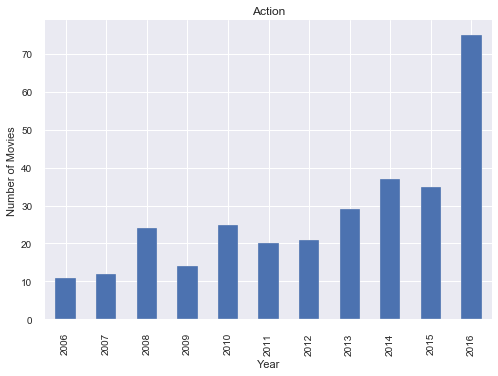

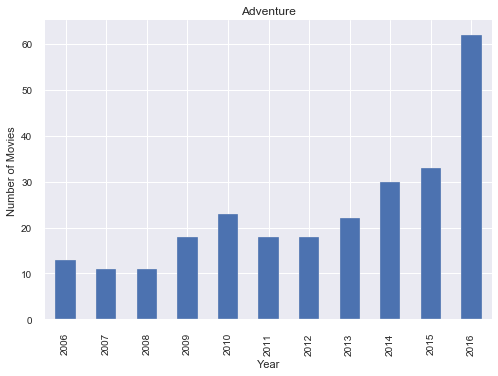

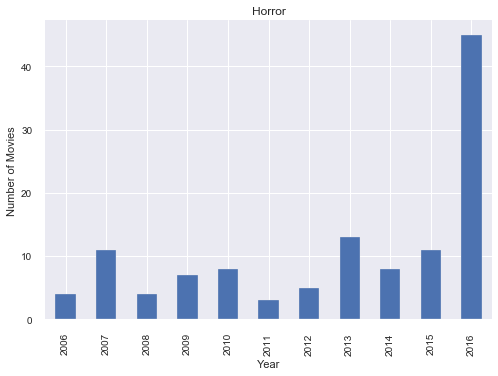

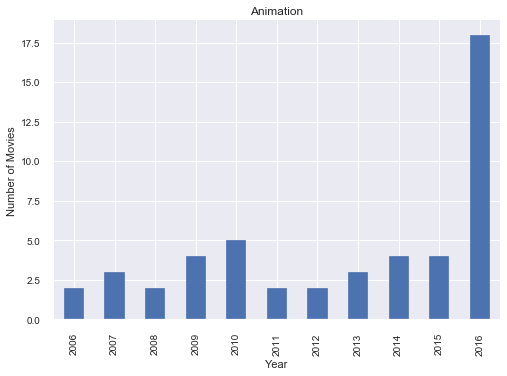

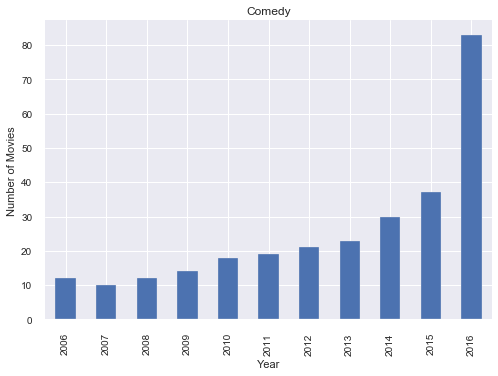

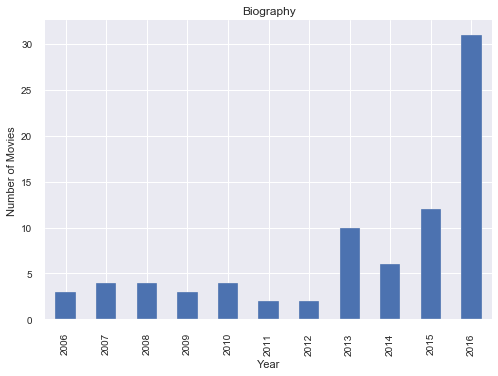

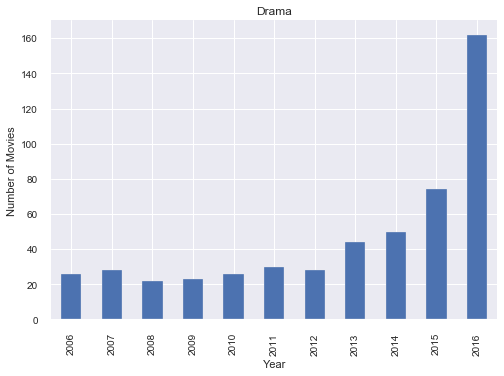

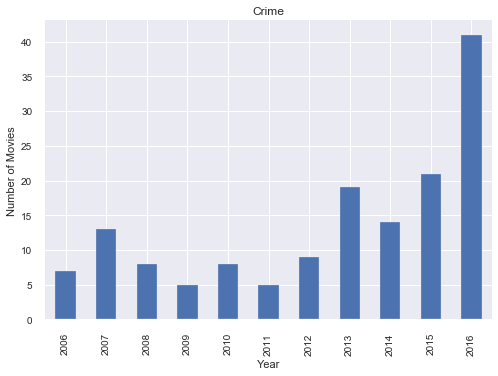

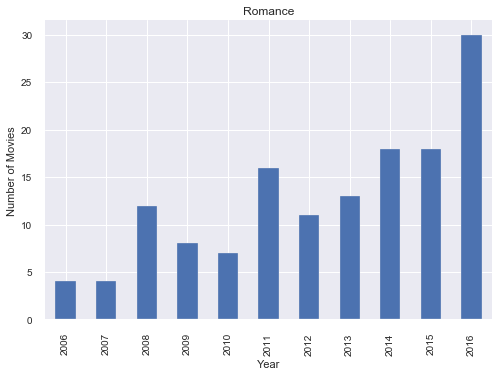

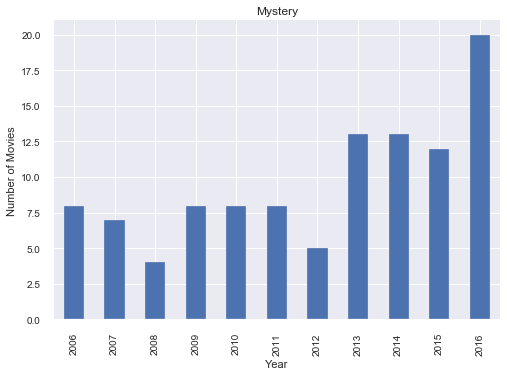

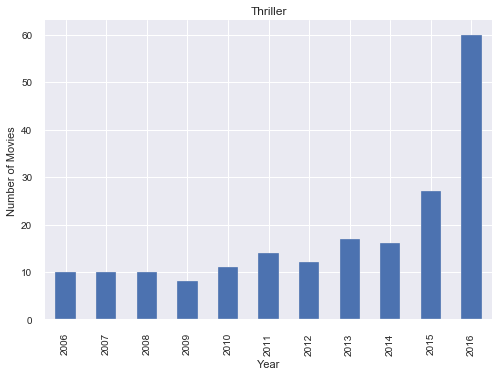

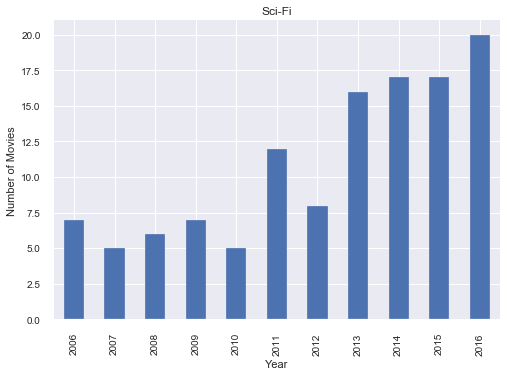

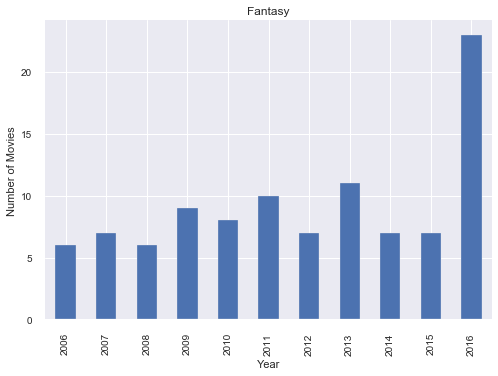

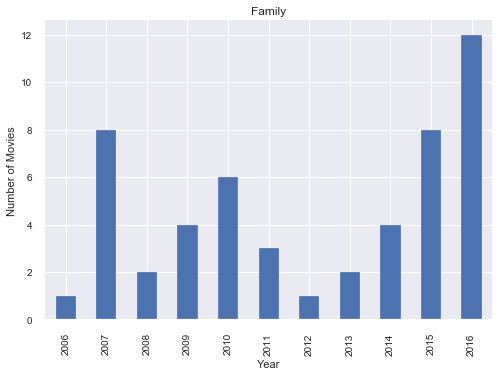

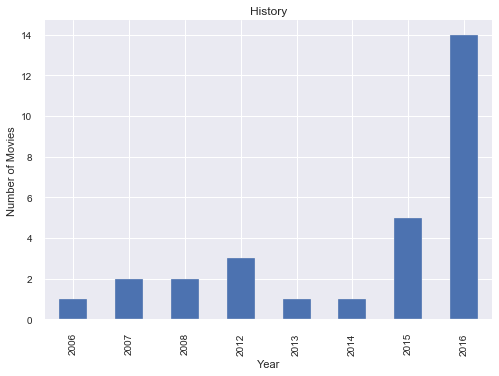

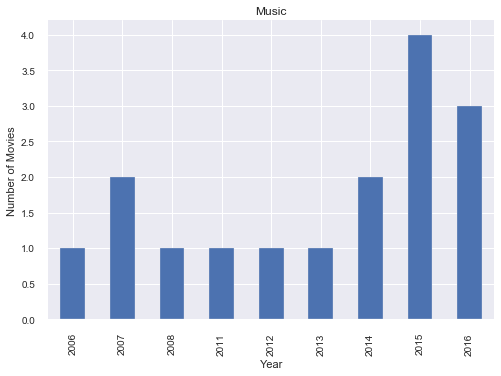

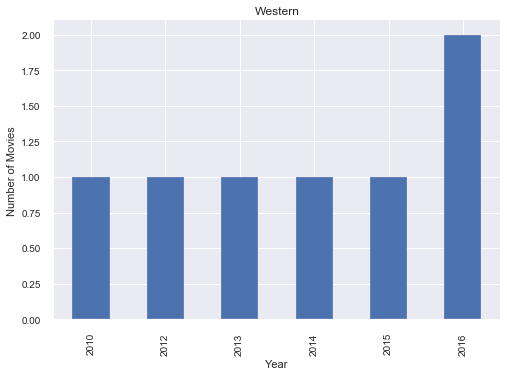

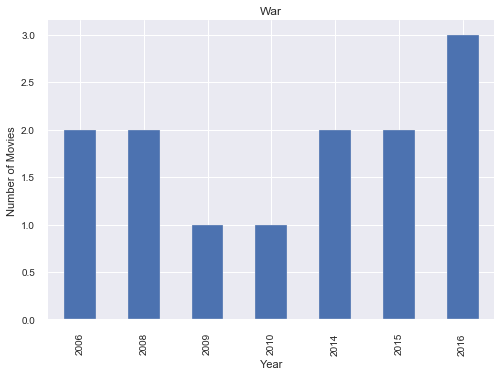

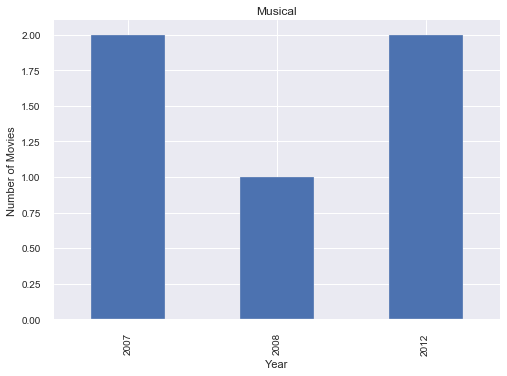

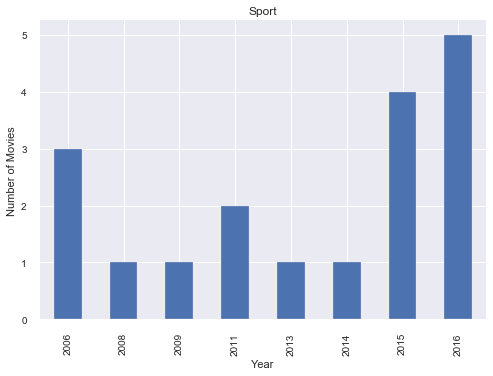

In [144]:
#Genre distribution of the sample
genre_count = np.zeros(len(list(unique_genre)))
i = 0
for genre in unique_genre:
    current_genre = (My_dataset['genre1'] == genre) | (My_dataset['genre2'] == genre) | (My_dataset['genre3'] == genre)
    plt.figure()
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    plt.title(str(genre))
    My_dataset[current_genre].year.value_counts().sort_index().plot.bar()
    genre_count[i] = len(My_dataset[current_genre])
    i += 1
print('Number of movies in each genre: \n')

In [145]:
genre_df = pd.DataFrame(genre_count, index=unique_genre, columns=['MovieCount'])
genre_df

,MovieCount
Action,303.0
Adventure,259.0
Horror,119.0
Animation,49.0
Comedy,279.0
Biography,81.0
Drama,513.0
Crime,150.0
Romance,141.0
Mystery,106.0


Text(0.5, 1.0, 'Total Movies proportion on basis of Genres')

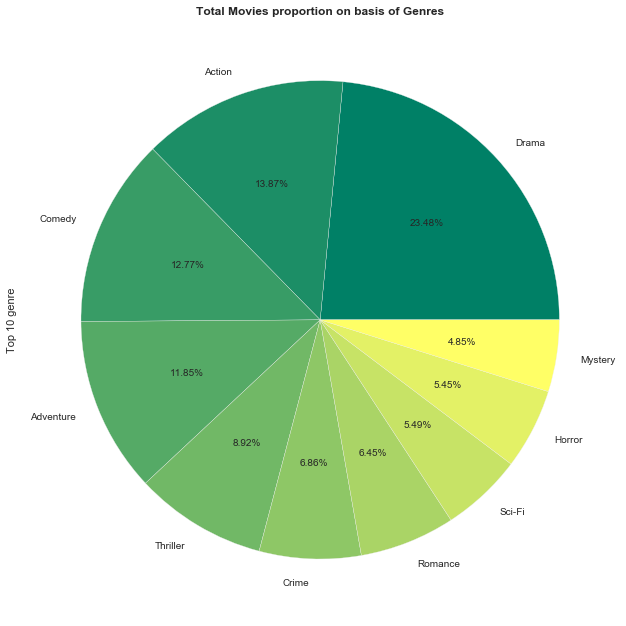

In [146]:
# Calculate Top 10 genre

genre_df.sort_values(by='MovieCount', ascending=False).head(10).plot.pie(legend=False, subplots=True, 
                      autopct='%.2f%%', figsize=(11,11), cmap = 'summer')
plt.ylabel('Top 10 genre')
plt.title('Total Movies proportion on basis of Genres', weight='bold')

### 6.1.2 Which Genre got highest Rating 

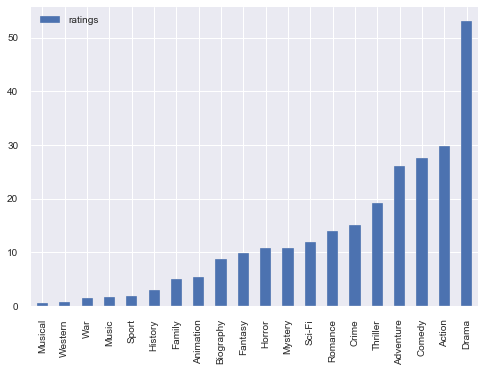

In [147]:
genre_ratings = np.zeros(len(list(unique_genre)))
i = 0
for genre in unique_genre:
    current_genre = (My_dataset['genre1'] == genre) | (My_dataset['genre2'] == genre) | (My_dataset['genre3'] == genre)
    genre_ratings[i] = My_dataset[current_genre].xs('rating', axis=1).sum() / My_dataset['rating'].sum() * 100
    i += 1
genre_ratings_df = pd.DataFrame(genre_ratings, index=unique_genre, columns=['ratings'])
genre_ratings_df.sort_index(by='ratings').plot.bar()

## 6.2  Analysis based on Movies Released Year.

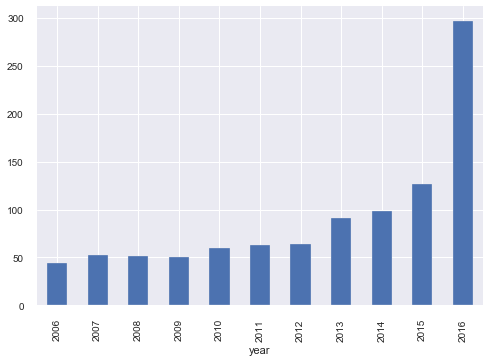

In [148]:
#Which year has maxium no. of movies released.
My_dataset.groupby('year')['title'].count().plot.bar()

In [149]:
My_dataset.groupby('year')['revenue_(millions)'].sum().sort_values(ascending=False)

year
2016    15626.270
2015    9525.910 
2014    8189.340 
2013    7810.675 
2012    6910.290 
2010    6133.605 
2009    5484.200 
2011    5479.945 
2008    5101.205 
2007    4498.170 
2006    3720.430 
Name: revenue_(millions), dtype: float64

## 6.2.1  Which Year has Highest Revenue Generated

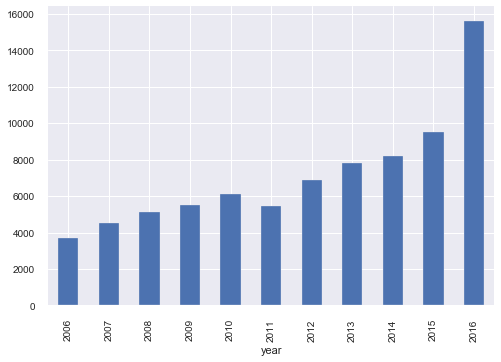

In [150]:
My_dataset.groupby('year')['revenue_(millions)'].sum().plot.bar()

# 6.3 Analysis Based on Directors & There respective Movies

## 6.3.1. Which Director has Directed maximum No. Of Movies

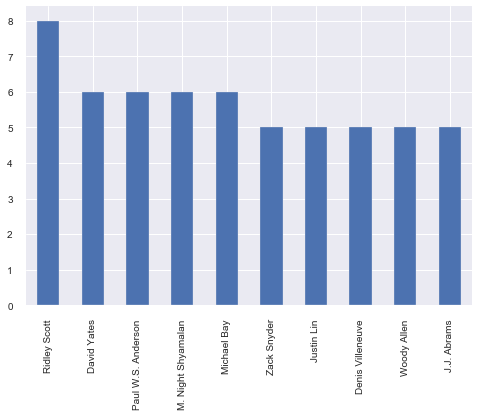

In [151]:
# Top 10 Directors count
My_dataset['director'].value_counts().head(10).plot.bar()

In [43]:
My_dataset['director'].value_counts()

Ridley Scott          8
David Yates           6
Paul W.S. Anderson    6
M. Night Shyamalan    6
Michael Bay           6
                     ..
Michael Showalter     1
Andrea Arnold         1
John Luessenhop       1
Gaspar Noé            1
Nitesh Tiwari         1
Name: director, Length: 644, dtype: int64

## 6.3.2 Which Director movie has generated highest reveune.

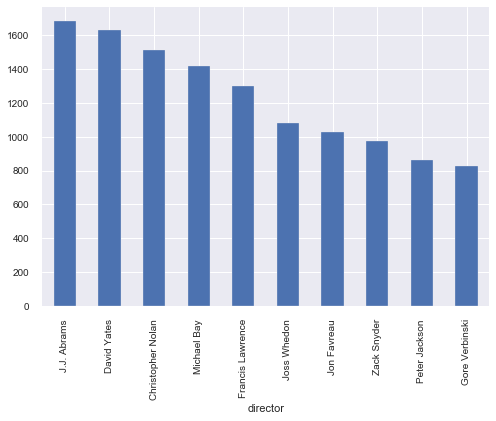

In [44]:
My_dataset.groupby('director')['revenue_(millions)'].sum().sort_values(ascending=False).head(10).plot.bar()

In [45]:
My_dataset.groupby('director')['revenue_(millions)'].sum().sort_values(ascending=False).head(10)

director
J.J. Abrams          1683.45
David Yates          1630.51
Christopher Nolan    1515.09
Michael Bay          1421.32
Francis Lawrence     1299.81
Joss Whedon          1082.27
Jon Favreau          1025.60
Zack Snyder          975.74 
Peter Jackson        860.45 
Gore Verbinski       829.82 
Name: revenue_(millions), dtype: float64

# 6.4 Analysis Based on Correlations between all the Dataset.

## 6.4.1 Checking correlation using rank,votes & metascore

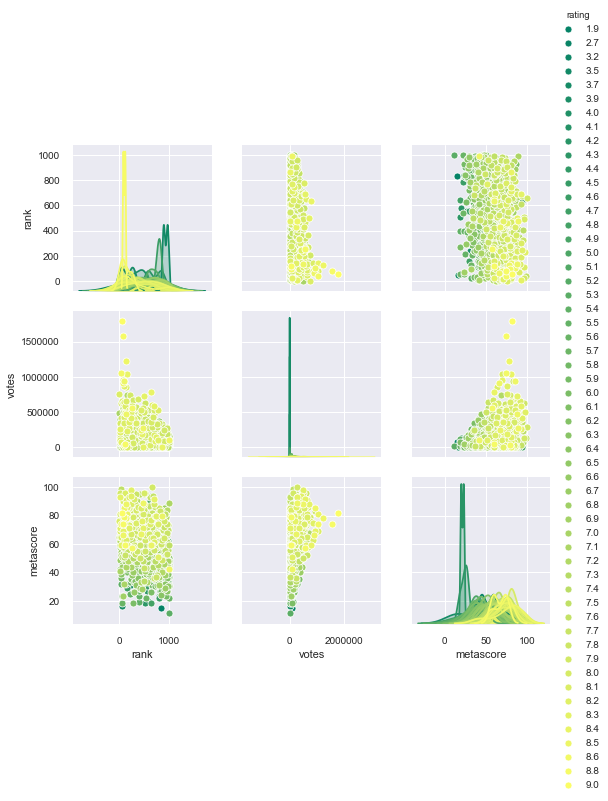

In [47]:
sns.pairplot(My_dataset, x_vars=['rank', 'votes', 'metascore'], y_vars= ['rank', 'votes', 'metascore'], hue='rating',palette='summer')

## Observation

.. Now from above graph its shows the correlation dependancy .

.. Votes & rank , votes and metascore are highly correlated with each other which means votes effects the rating of a movie.

## 6.4.2 Checking correlation using Revenue , Rating & Metascore.

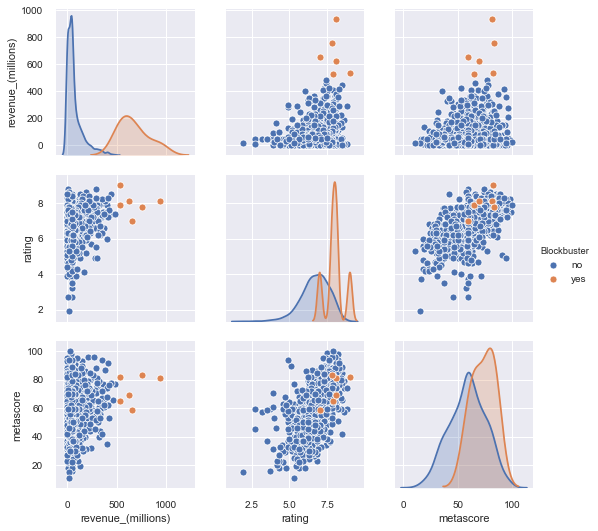

In [74]:
sns.pairplot(My_dataset, x_vars=['revenue_(millions)', 'rating', 'metascore'], y_vars= ['revenue_(millions)', 'rating', 'metascore'], 
             
             hue='Blockbuster')

...Rating and Metascore have strong correlation. 

....From the above we can observer from the above plot that Blockbuster depends on rating & metascore parameters.

## 6.4.3 Checking Correlation using rating & Runtime.

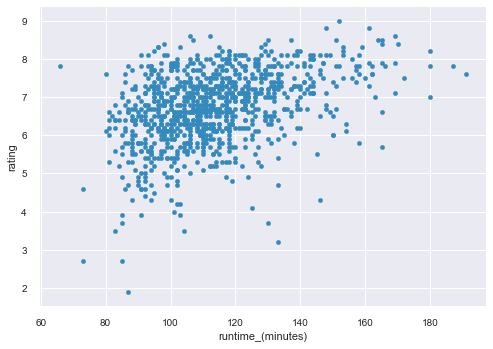

In [78]:
corr = My_dataset.sort_values(by='rating', ascending=False).plot.scatter(x='runtime_(minutes)', y='rating')

## Observation
Most of the movies that have good rating more than 6 have a runtime between 90 - 120 minutes.

# 6.5 Analysis based on movies categorised in Blockbuster 

## 6.5.1 Using boxplot analyze how rating effects the Blockbuster.

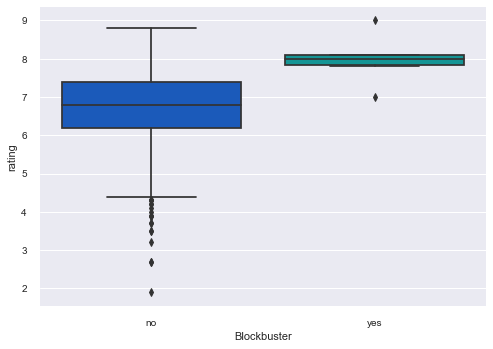

In [81]:
#using boxplot analyze how rating effects the Blockbuster.

sns.boxplot(x="Blockbuster", y="rating", data=My_dataset, palette='winter')

> From Above graph its clear that high rating of a movie reflects sky-scraping blokbuster.

## 6.5.2 Using boxplot analyze how Revenue effects the Blockbuster.

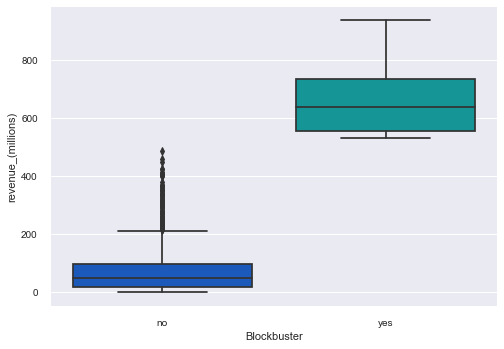

In [109]:
#using boxplot analyze how Revenue effects the Blockbuster.

sns.boxplot(x="Blockbuster", y="revenue_(millions)", data=My_dataset, palette='winter')

## 6.5.3 Using boxplot analyze how Runtime effects the Blockbuster.

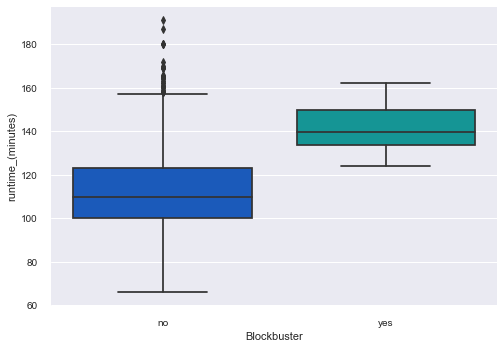

In [110]:
#using boxplot analyze how Runtime ef fects the Blockbuster.

sns.boxplot(x="Blockbuster", y="runtime_(minutes)", data=My_dataset, palette='winter')

# 7.Conclusion

The preparation of the data,modeling structure and then the visualization of these data with a wide variety of graphs, and finally the interpretation of these graphs made it possible to conduct an analysis and a global view of movies released in the cinema between 2006 and 2016.


This study through a large volume of data, allowed me to determine the following points for movies between 2006 and 2016:

- It is analyzed that the items in genre & actors dataset can be further categorised individually for giving better results.

- From the above graphs we can see that the movies released in 2014,2015 & 2016 are listed more

- Most movies last between 60 minutes and 120 minutes.

- Its clear from the correlations that Votes,Metascore are important for a movie to get the good Rating, so more rating proportinal to the reveune of the movie. 

- Movies that are well rated by public and critics make the most money.

- The more the public appreciates a film, the more they vote and give a good rating.

- Animation, biography, crime, drama, mystery and sci-fi movies are the highest rated by critics.

- Action, adventure, animation and family movies are the ones that made the most money.



## 7.1 Actionable Insights

- People tend to vote more when they liked a film so director has to be more emphasis on the storline that binnd the audience.

- Invest more in technology to to get high revenue such as movie like Avatar.

- In genre we can see the Drama type movies are most watched by people , so they have to be more focus on other parts (genre)
  to make it profitable.

- Now a days people are more often concerned and watch movies based on female actress as lead role like Wonder Woman which 
  is the Superhit movie.So this time Producer/Director have to change there theme accordingly. 
    